In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

sys.path.append('..')
from residualbind import ResidualBind, GlobalImportance
import helper

Using TensorFlow backend.


In [2]:
experiment = 'RNCMPT00168'
rbp_index = 69

motif = 'UGCAUGC'

normalization = 'clip_norm'   # 'log_norm' or 'clip_norm'
ss_type = 'seq'                  # 'seq', 'pu', or 'struct'
data_path = '../../data/RNAcompete_2013/rnacompete2013.h5'
results_path = os.path.join('..','..','results')
save_path = os.path.join(results_path, normalization+'_'+ss_type)
plot_path = helper.make_directory(save_path, 'plots')

In [3]:
# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)


In [4]:
# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)
model.load_weights()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


NameError: name 'weights_path' is not defined

In [14]:
# loop over positions and measure effect size of intervention
patterns = ['UGCAUGC', 'UGCAUGUGCAUGC','UGCAUGCUGCAUGC', 'UGCAUGCNNNUGCAUGC']
position = 15

# instantiate global importance
gi = GlobalImportance(model, class_index=0, alphabet='ACGU')

# set null sequence model
null_seq_model = np.mean(np.squeeze(train['inputs']), axis=0)
null_seq_model /= np.sum(null_seq_model, axis=1, keepdims=True)
gi.set_null_model(null_seq_model, num_sim=1000)

# get global importance of patterns
all_scores = []
for pattern in patterns:
    all_scores.append(gi.predict_effect((pattern, position)))

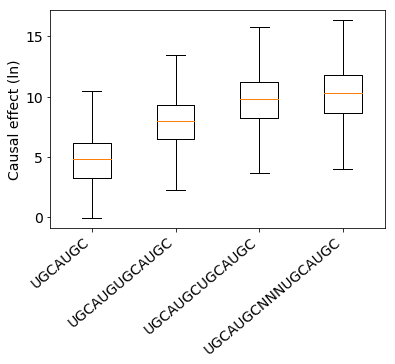

In [22]:
fig = plt.figure()
plt.boxplot(all_scores, showfliers=False);
plt.xticks(np.array([1, 2, 3, 4]), patterns, rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14);
plt.yticks([0,5, 10, 15])
plt.ylabel('Effect size', fontsize=14)
outfile = os.path.join(save_path, experiment+'.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
